Anomaly Detection


[<Axes: >]

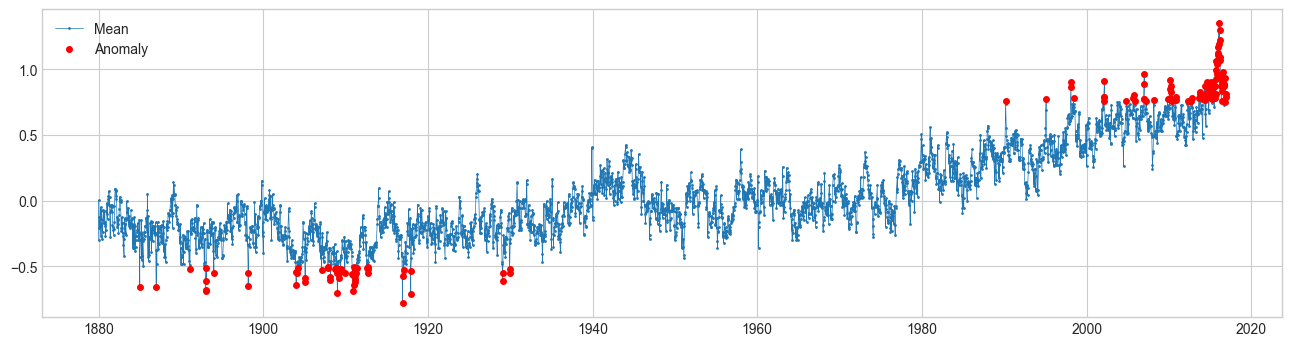

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import *

source = 'c:/Users/Niranjan/Desktop/Dev/monthly.csv'
data = pd.read_csv(source)
data["Date"] = pd.to_datetime(data["Date"])
data = data.set_index("Date")
data = data["Mean"]

##ThresholdAD
threshold_detector = ThresholdAD(low= -0.5, high = 0.75)
anomalies = threshold_detector.detect(data)
print(plot(data,anomaly=anomalies,anomaly_color="red",anomaly_tag="marker"))

[<Axes: >]

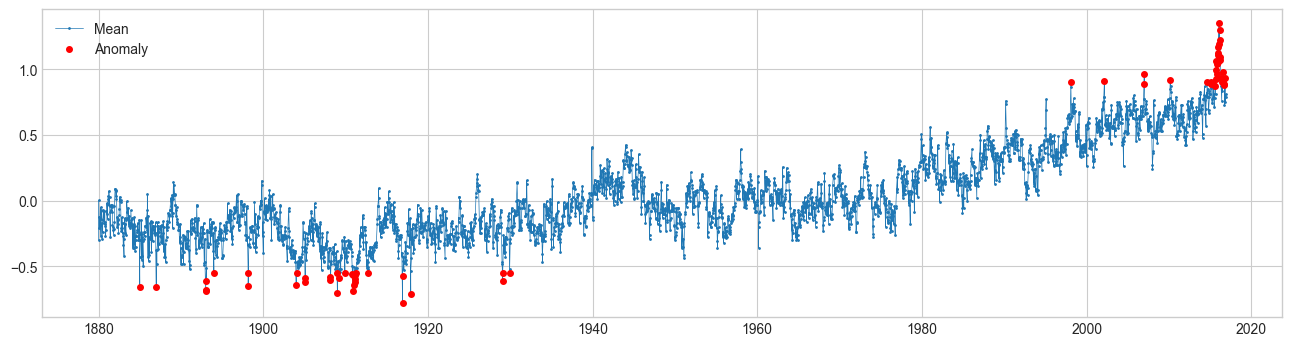

In [37]:
#QuantileAD
quantile_detector = QuantileAD(low= 0.01, high = 0.99)
anomalies = quantile_detector.fit_detect(data)
print(plot(data,anomaly=anomalies,anomaly_color="red",anomaly_tag="marker"))

[<Axes: >]

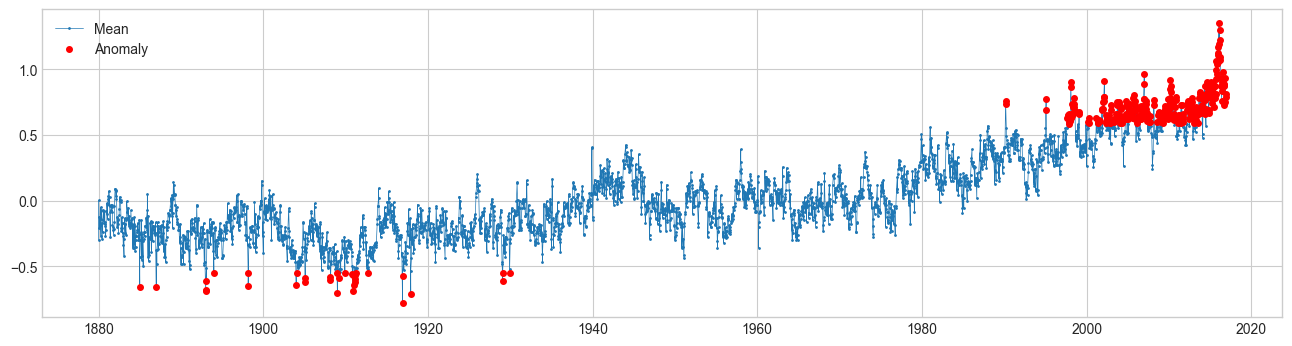

In [42]:
#iqr detector
iqr_detector = InterQuartileRangeAD(c=0.76)
anomalies = iqr_detector.fit_detect(data)
print(plot(data,anomaly=anomalies,anomaly_color="red",anomaly_tag="marker"))

In [44]:
dataT = yf.download("TSLA")['Close']
dataT = validate_series(dataT)

[*********************100%***********************]  1 of 1 completed


[<Axes: >]

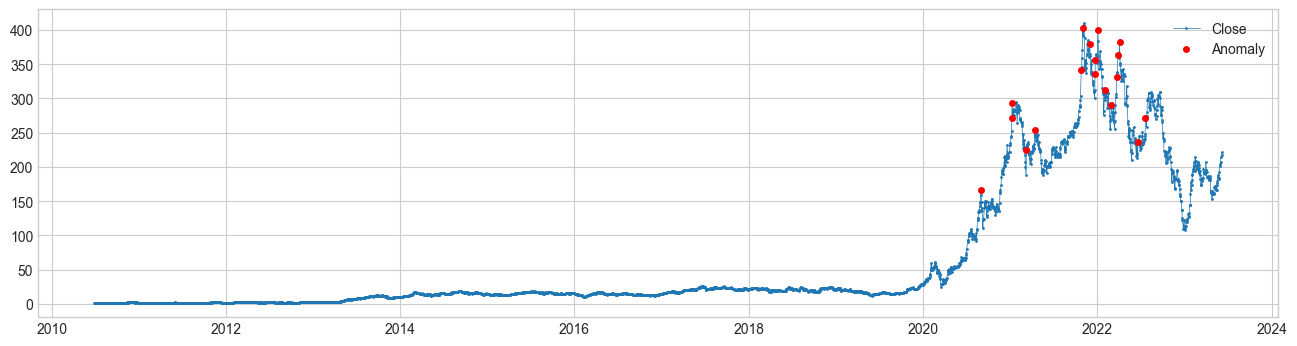

In [47]:
persist_detector = PersistAD(c = 20.0, side = "positive")
anomalies = persist_detector.fit_detect(dataT)
print(plot(dataT,anomaly=anomalies,anomaly_color="red",anomaly_tag="marker"))

In [ ]:
d